<a href="https://colab.research.google.com/github/GuanRuLai/Python-Maching-Learning/blob/main/Upper_Confidence_Bound(UCB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [ ]:
import pandas as pd
df = pd.read_csv("Ads_CTR_Optimisation.csv")

# Reinforcement learning model processing

## Model training

In [ ]:
import math

N = 1000 # the number of rounds/users is 10000(can be adjust to test the model)
d = 10 # the number of kinds of ads
ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0

  for i in range(0, d):
    if number_of_selections[i] > 0: # check if the ad is selected
      avg_reward = sum_of_rewards[i] / number_of_selections[i]
      CI = math.sqrt(3 / 2 * math.log(n + 1) / number_of_selections[i])
      upper_bound = avg_reward + CI
    else:
      upper_bound = 1e400 # ensure the ad is selected

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = df.values[n, ad]
  sum_of_rewards[ad] += reward
  total_rewards += reward

## Visualizing the results

Text(0, 0.5, 'Number of times each ad was selected')

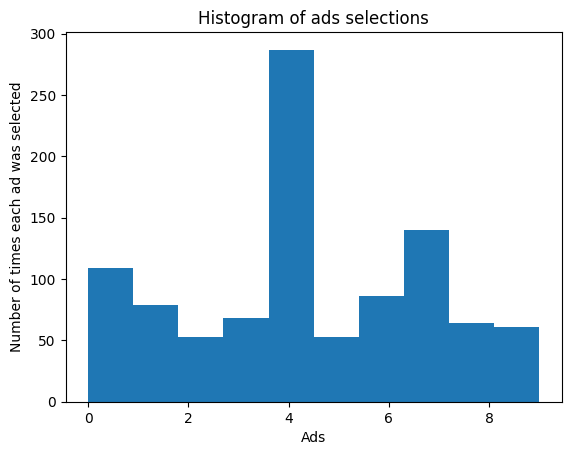

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")